# Example
The below is an example of how to use the various reaction representations provided in this github repo.
The four datasets (SN2, Grambow, hfb and e.e.) are available with equivalent functions.

In [1]:
import numpy as np

In [2]:
from src.reaction_reps import QML, DScribe
from src.learning import opt_hyperparams, learning_curve

In [ ]:
import matplotlib.pyplot as plt

In [3]:
qml = QML()
qml.get_sn2_data()

In [4]:
energies = qml.energies

In [6]:
slatm_2_r, slatm_2_p, slatm_2_d = qml.get_SLATM_twobody()

In [7]:
slatm_r, slatm_p, slatm_d = qml.get_SLATM()

In [8]:
b2r2_l = qml.get_b2r2_linear_bags(Rcut=6)

In [9]:
cm_r, cm_p, cm_rp = qml.get_CM()

In [10]:
bob_r, bob_p, bob_rp = qml.get_BoB()

In [11]:
fchl_r, fchl_p, fchl_d = qml.get_FCHL19()

In [12]:
ds = DScribe()
ds.get_sn2_data()
soap_r, soap_p, soap_d = ds.get_SOAP()

In [13]:
# find hyperparams in SI (or use opt_hyperparams function)

In [14]:
train_sizes, mae_slatm_2_d, std_slatm_2_d = learning_curve(slatm_2_d, energies, CV=10, sigma=100, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [15]:
train_sizes, mae_slatm_d, std_slatm_d = learning_curve(slatm_d, energies, CV=10, sigma=100, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [16]:
train_sizes, mae_soap_d, std_soap_d = learning_curve(soap_d, energies, CV=10, sigma=1, l2reg=1e-4)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [17]:
train_sizes, mae_fchl_d, std_fchl_d = learning_curve(fchl_d, energies, CV=10, sigma=100, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [18]:
train_sizes, mae_bob_rp, std_bob_rp = learning_curve(bob_rp, energies, CV=10, sigma=1000, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [19]:
train_sizes, mae_cm_rp, std_cm_rp = learning_curve(cm_rp, energies, CV=10, sigma=100, l2reg=1e-6)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [20]:
train_sizes, mae_b2r2_l, std_b2r2_l = learning_curve(b2r2_l, energies, CV=10, sigma=1e4, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [21]:
def polyfit(train_sizes, maes):
    m, c = np.polyfit(np.log(train_sizes), np.log(maes), 1)
    polyfit = np.exp(m * np.log(train_sizes) + c)
    return polyfit

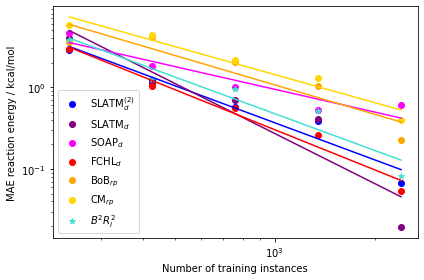

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xscale('log')
ax.set_yscale('log')

ax.scatter(train_sizes, mae_slatm_2_d, color='blue', label='SLATM$_d^{(2)}$')
ax.plot(train_sizes, polyfit(train_sizes, mae_slatm_2_d), color='blue')

ax.scatter(train_sizes, mae_slatm_d, color='purple', label='SLATM$_d$')
ax.plot(train_sizes, polyfit(train_sizes, mae_slatm_d), color='purple')

ax.scatter(train_sizes, mae_soap_d, color='magenta', label='SOAP$_d$')
ax.plot(train_sizes, polyfit(train_sizes, mae_soap_d), color='magenta')

ax.scatter(train_sizes, mae_fchl_d, color='red', label='FCHL$_d$')
ax.plot(train_sizes, polyfit(train_sizes, mae_fchl_d), color='red')

ax.scatter(train_sizes, mae_bob_rp, color='orange', label='BoB$_{rp}$')
ax.plot(train_sizes, polyfit(train_sizes, mae_bob_rp), color='orange')

ax.scatter(train_sizes, mae_cm_rp, color='gold', label='CM$_{rp}$')
ax.plot(train_sizes, polyfit(train_sizes, mae_cm_rp), color='gold')

ax.scatter(train_sizes, mae_b2r2_l, color='turquoise', marker='*', label='$B^2R^2_l$')
ax.plot(train_sizes, polyfit(train_sizes, mae_b2r2_l), color='turquoise')

ax.set_xlabel("Number of training instances")
ax.set_ylabel("MAE reaction energy / kcal/mol")
plt.legend()
plt.tight_layout()
plt.show()